In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


**SUMSTATS HARMONIZATION**

**BBJ**

In [8]:
import pandas as pd

# Step 1: Load BBJ variants
bbj = pd.read_csv('/scratch/07880/devansh/CAD/New_PRS/bbj.CAD.rsq07.mac10/CAD.auto.rsq07.mac10.txt.gz', delim_whitespace = True, compression="gzip")
split = bbj["SNPID"].str.split("_", expand=True)
bbj["CHR"] = split[0].astype(str)
bbj["POS"] = split[1].astype(int)
bbj["REF"] = split[2]
bbj["ALT"] = split[3]

# Optional: reduce BBJ to unique variants for faster matching
bbj_variants = bbj[["CHR", "POS", "REF", "ALT"]].drop_duplicates()

In [10]:
bbj_variants.tail()

,CHR,POS,REF,ALT
8678726,9,141066409,G,A
8678727,9,141066491,G,A
8678728,9,141066800,G,A
8678729,9,141067003,G,C
8678730,9,141067985,T,C


In [11]:
# Step 2: Prepare output list
matched_chunks = []

# Step 3: Stream and match in chunks
chunksize = 500000
reader = pd.read_csv("dbsnp_rsmap.tsv.gz", sep="\t", names=["CHR_raw", "POS", "REF", "ALT", "rsID"], compression="gzip", chunksize=chunksize)

for i, chunk in enumerate(reader):
    # Normalize chromosome: extract number from RefSeq
    chunk["CHR"] = chunk["CHR_raw"].str.extract(r'NC_0+(\d+)\.')[0]
    chunk["CHR"] = chunk["CHR"].astype(str).replace({"23": "X", "24": "Y"})

    # Explode multiallelic ALT
    chunk = chunk.assign(ALT=chunk["ALT"].str.split(",")).explode("ALT")

    # Subset columns
    chunk = chunk[["CHR", "POS", "REF", "ALT", "rsID"]]

    # Merge with BBJ
    matched = pd.merge(bbj_variants, chunk, on=["CHR", "POS", "REF", "ALT"], how="inner")
    matched_chunks.append(matched)

    print(f"✅ Processed chunk {i+1}")

# Step 4: Combine all matched rsIDs
rsid_map = pd.concat(matched_chunks, ignore_index=True)

# Step 5: Merge rsID back into original BBJ data
bbj_with_rsid = pd.merge(bbj, rsid_map, on=["CHR", "POS", "REF", "ALT"], how="left")

# Step 6: Save
bbj_with_rsid.to_csv("bbj_sumstats_with_rsids.txt", sep="\t", index=False)
print("✔️ Matching complete and saved.")

✅ Processed chunk 1
✅ Processed chunk 2
✅ Processed chunk 3
✅ Processed chunk 4
✅ Processed chunk 5
✅ Processed chunk 6
✅ Processed chunk 7
✅ Processed chunk 8
✅ Processed chunk 9
✅ Processed chunk 10
✅ Processed chunk 11
✅ Processed chunk 12
✅ Processed chunk 13
✅ Processed chunk 14
✅ Processed chunk 15
✅ Processed chunk 16
✅ Processed chunk 17
✅ Processed chunk 18
✅ Processed chunk 19
✅ Processed chunk 20
✅ Processed chunk 21
✅ Processed chunk 22
✅ Processed chunk 23
✅ Processed chunk 24
✅ Processed chunk 25
✅ Processed chunk 26
✅ Processed chunk 27
✅ Processed chunk 28
✅ Processed chunk 29
✅ Processed chunk 30
✅ Processed chunk 31
✅ Processed chunk 32
✅ Processed chunk 33
✅ Processed chunk 34
✅ Processed chunk 35
✅ Processed chunk 36
✅ Processed chunk 37
✅ Processed chunk 38
✅ Processed chunk 39
✅ Processed chunk 40
✅ Processed chunk 41
✅ Processed chunk 42
✅ Processed chunk 43
✅ Processed chunk 44
✅ Processed chunk 45
✅ Processed chunk 46
✅ Processed chunk 47
✅ Processed chunk 48
✅

✅ Processed chunk 399
✅ Processed chunk 400
✅ Processed chunk 401
✅ Processed chunk 402
✅ Processed chunk 403
✅ Processed chunk 404
✅ Processed chunk 405
✅ Processed chunk 406
✅ Processed chunk 407
✅ Processed chunk 408
✅ Processed chunk 409
✅ Processed chunk 410
✅ Processed chunk 411
✅ Processed chunk 412
✅ Processed chunk 413
✅ Processed chunk 414
✅ Processed chunk 415
✅ Processed chunk 416
✅ Processed chunk 417
✅ Processed chunk 418
✅ Processed chunk 419
✅ Processed chunk 420
✅ Processed chunk 421
✅ Processed chunk 422
✅ Processed chunk 423
✅ Processed chunk 424
✅ Processed chunk 425
✅ Processed chunk 426
✅ Processed chunk 427
✅ Processed chunk 428
✅ Processed chunk 429
✅ Processed chunk 430
✅ Processed chunk 431
✅ Processed chunk 432
✅ Processed chunk 433
✅ Processed chunk 434
✅ Processed chunk 435
✅ Processed chunk 436
✅ Processed chunk 437
✅ Processed chunk 438
✅ Processed chunk 439
✅ Processed chunk 440
✅ Processed chunk 441
✅ Processed chunk 442
✅ Processed chunk 443
✅ Processe

✅ Processed chunk 772
✅ Processed chunk 773
✅ Processed chunk 774
✅ Processed chunk 775
✅ Processed chunk 776
✅ Processed chunk 777
✅ Processed chunk 778
✅ Processed chunk 779
✅ Processed chunk 780
✅ Processed chunk 781
✅ Processed chunk 782
✅ Processed chunk 783
✅ Processed chunk 784
✅ Processed chunk 785
✅ Processed chunk 786
✅ Processed chunk 787
✅ Processed chunk 788
✅ Processed chunk 789
✅ Processed chunk 790
✅ Processed chunk 791
✅ Processed chunk 792
✅ Processed chunk 793
✅ Processed chunk 794
✅ Processed chunk 795
✅ Processed chunk 796
✅ Processed chunk 797
✅ Processed chunk 798
✅ Processed chunk 799
✅ Processed chunk 800
✅ Processed chunk 801
✅ Processed chunk 802
✅ Processed chunk 803
✅ Processed chunk 804
✅ Processed chunk 805
✅ Processed chunk 806
✅ Processed chunk 807
✅ Processed chunk 808
✅ Processed chunk 809
✅ Processed chunk 810
✅ Processed chunk 811
✅ Processed chunk 812
✅ Processed chunk 813
✅ Processed chunk 814
✅ Processed chunk 815
✅ Processed chunk 816
✅ Processe

✅ Processed chunk 1139
✅ Processed chunk 1140
✅ Processed chunk 1141
✅ Processed chunk 1142
✅ Processed chunk 1143
✅ Processed chunk 1144
✅ Processed chunk 1145
✅ Processed chunk 1146
✅ Processed chunk 1147
✅ Processed chunk 1148
✅ Processed chunk 1149
✅ Processed chunk 1150
✅ Processed chunk 1151
✅ Processed chunk 1152
✅ Processed chunk 1153
✅ Processed chunk 1154
✅ Processed chunk 1155
✅ Processed chunk 1156
✅ Processed chunk 1157
✅ Processed chunk 1158
✅ Processed chunk 1159
✅ Processed chunk 1160
✅ Processed chunk 1161
✅ Processed chunk 1162
✅ Processed chunk 1163
✅ Processed chunk 1164
✅ Processed chunk 1165
✅ Processed chunk 1166
✅ Processed chunk 1167
✅ Processed chunk 1168
✅ Processed chunk 1169
✅ Processed chunk 1170
✅ Processed chunk 1171
✅ Processed chunk 1172
✅ Processed chunk 1173
✅ Processed chunk 1174
✅ Processed chunk 1175
✅ Processed chunk 1176
✅ Processed chunk 1177
✅ Processed chunk 1178
✅ Processed chunk 1179
✅ Processed chunk 1180
✅ Processed chunk 1181
✅ Processed

✅ Processed chunk 1496
✅ Processed chunk 1497
✅ Processed chunk 1498
✅ Processed chunk 1499
✅ Processed chunk 1500
✅ Processed chunk 1501
✅ Processed chunk 1502
✅ Processed chunk 1503
✅ Processed chunk 1504
✅ Processed chunk 1505
✅ Processed chunk 1506
✅ Processed chunk 1507
✅ Processed chunk 1508
✅ Processed chunk 1509
✅ Processed chunk 1510
✅ Processed chunk 1511
✅ Processed chunk 1512
✅ Processed chunk 1513
✅ Processed chunk 1514
✅ Processed chunk 1515
✅ Processed chunk 1516
✅ Processed chunk 1517
✅ Processed chunk 1518
✅ Processed chunk 1519
✅ Processed chunk 1520
✅ Processed chunk 1521
✅ Processed chunk 1522
✅ Processed chunk 1523
✅ Processed chunk 1524
✅ Processed chunk 1525
✅ Processed chunk 1526
✅ Processed chunk 1527
✅ Processed chunk 1528
✅ Processed chunk 1529
✅ Processed chunk 1530
✅ Processed chunk 1531
✅ Processed chunk 1532
✅ Processed chunk 1533
✅ Processed chunk 1534
✅ Processed chunk 1535
✅ Processed chunk 1536
✅ Processed chunk 1537
✅ Processed chunk 1538
✅ Processed

✅ Processed chunk 1853
✅ Processed chunk 1854
✅ Processed chunk 1855
✅ Processed chunk 1856
✅ Processed chunk 1857
✅ Processed chunk 1858
✅ Processed chunk 1859
✅ Processed chunk 1860
✅ Processed chunk 1861
✅ Processed chunk 1862
✅ Processed chunk 1863
✅ Processed chunk 1864
✅ Processed chunk 1865
✅ Processed chunk 1866
✅ Processed chunk 1867
✅ Processed chunk 1868
✅ Processed chunk 1869
✅ Processed chunk 1870
✅ Processed chunk 1871
✅ Processed chunk 1872
✅ Processed chunk 1873
✅ Processed chunk 1874
✅ Processed chunk 1875
✅ Processed chunk 1876
✅ Processed chunk 1877
✅ Processed chunk 1878
✅ Processed chunk 1879
✅ Processed chunk 1880
✅ Processed chunk 1881
✅ Processed chunk 1882
✅ Processed chunk 1883
✅ Processed chunk 1884
✅ Processed chunk 1885
✅ Processed chunk 1886
✅ Processed chunk 1887
✅ Processed chunk 1888
✅ Processed chunk 1889
✅ Processed chunk 1890
✅ Processed chunk 1891
✅ Processed chunk 1892
✅ Processed chunk 1893
✅ Processed chunk 1894
✅ Processed chunk 1895
✅ Processed

✅ Processed chunk 2210
✅ Processed chunk 2211
✅ Processed chunk 2212
✅ Processed chunk 2213
✅ Processed chunk 2214
✅ Processed chunk 2215
✅ Processed chunk 2216
✅ Processed chunk 2217
✅ Processed chunk 2218
✅ Processed chunk 2219
✅ Processed chunk 2220
✅ Processed chunk 2221
✅ Processed chunk 2222
✅ Processed chunk 2223
✅ Processed chunk 2224
✅ Processed chunk 2225
✅ Processed chunk 2226
✅ Processed chunk 2227
✅ Processed chunk 2228
✅ Processed chunk 2229
✅ Processed chunk 2230
✅ Processed chunk 2231
✅ Processed chunk 2232
✅ Processed chunk 2233
✅ Processed chunk 2234
✅ Processed chunk 2235
✅ Processed chunk 2236
✅ Processed chunk 2237
✅ Processed chunk 2238
✅ Processed chunk 2239
✅ Processed chunk 2240
✅ Processed chunk 2241
✅ Processed chunk 2242
✅ Processed chunk 2243
✅ Processed chunk 2244
✅ Processed chunk 2245
✅ Processed chunk 2246
✅ Processed chunk 2247
✅ Processed chunk 2248
✅ Processed chunk 2249
✅ Processed chunk 2250
✅ Processed chunk 2251
✅ Processed chunk 2252
✅ Processed

In [26]:
df = pd.read_csv('bbj_sumstats_with_rsids.txt', sep = '\t')

In [27]:
df.head()

,CHR,POS,SNPID,Allele1,Allele2,AC_Allele2,AF_Allele2,N,BETA,SE,...,Is.SPA.converge,varT,varTstar,AF.Cases,AF.Controls,Rsq,MAC,REF,ALT,rsID
0,1,751343,1_751343_T_A,T,A,59762.281250,0.140648,212453,-0.004759,0.015002,...,1,4443.110791,4717.580573,0.139950,0.140585,0.81495,59762.281250,T,A,rs28544273
1,1,751756,1_751756_T_C,T,C,59438.460938,0.139886,212453,-0.004743,0.014943,...,1,4478.263732,4754.905059,0.139261,0.139898,0.82467,59438.460938,T,C,rs28527770
2,1,752566,1_752566_G_A,G,A,358001.437500,0.842543,212453,0.002978,0.012945,...,1,5967.474439,6336.110622,0.842764,0.842280,0.99635,66904.600000,G,A,rs3094315
3,1,752894,1_752894_T_C,T,C,364165.843750,0.857050,212453,0.003875,0.014328,...,1,4871.034599,5171.939047,0.856721,0.856154,0.87632,60740.200000,T,C,rs3131971
4,1,753405,1_753405_C_A,C,A,364298.281250,0.857362,212453,0.004429,0.014700,...,1,4627.504908,4913.365495,0.857761,0.857151,0.83709,60607.700000,C,A,rs3115860


In [28]:
missing = df[df["rsID"].isnull()]
print(f"{len(missing)} variants did not map to rsIDs.")

353671 variants did not map to rsIDs.


In [29]:
len(df)

8680310

In [30]:
df = df.dropna()

In [31]:
df = df.rename(columns={
        "rsID": "SNP",
        "Allele2": "A1",
        "Allele1": "A2",
        "BETA": "BETA",
        "SE": "SE",
        "p.value": "P",
        "N": "N"
})
df = df[["SNP", "A1", "A2", "BETA", "SE", "P", "N"]].dropna()
df.to_csv("harmonized_bbj.txt", sep="\t", index=False)

In [34]:
df.head()

,SNP,A1,A2,BETA,SE,P,N
0,rs28544273,A,T,-0.004759,0.015002,0.751065,212453
1,rs28527770,C,T,-0.004743,0.014943,0.750928,212453
2,rs3094315,A,G,0.002978,0.012945,0.818030,212453
3,rs3131971,C,T,0.003875,0.014328,0.786840,212453
4,rs3115860,A,C,0.004429,0.014700,0.763195,212453


**FINNGEN**

In [42]:
df_finn = pd.read_csv('/scratch/07880/devansh/CAD/New_PRS/finngen_R12_I9_CORATHER.gz', delim_whitespace = True, compression="gzip")

/tmp/ipykernel_1558538/130711349.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_finn = pd.read_csv('/scratch/07880/devansh/CAD/New_PRS/finngen_R12_I9_CORATHER.gz', delim_whitespace = True, compression="gzip")


In [43]:
df_finn.head()

,#chrom,pos,ref,alt,rsids,nearest_genes,pval,mlogp,beta,sebeta,af_alt,af_alt_cases,af_alt_controls
0,1,13668,G,A,rs2691328,DDX11L1,0.510786,0.291761,0.054805,0.083339,0.005995,0.006057,0.005986
1,1,14506,G,A,rs1240557819,WASH7P,0.863916,0.063528,0.015367,0.089662,0.004636,0.004710,0.004625
2,1,14521,C,T,rs1378626194,WASH7P,0.837020,0.077264,-0.036800,0.178897,0.001083,0.001008,0.001094
3,1,14717,G,A,rs377122907,WASH7P,0.583359,0.234064,-0.208549,0.380227,0.000234,0.000217,0.000237
4,1,14773,C,T,rs878915777,WASH7P,0.659695,0.180657,-0.021393,0.048584,0.014195,0.014218,0.014192


In [44]:
df_finn = df_finn.rename(columns={
    "rsids":'SNP',
        "alt": "A1",
        "ref": "A2",
        "beta": "BETA",
        "sebeta": "SE",
        "pval": "P"
    })

# Set sample size — adjust for your phenotype
df_finn["N"] = 479478


df_finn = df_finn[["SNP", "A1", "A2", "BETA", "SE", "P", "N"]].dropna()
df_finn.to_csv('harmonized_finngen.txt', sep="\t", index=False)

In [45]:
df_finn.head()

,SNP,A1,A2,BETA,SE,P,N
0,rs2691328,A,G,0.054805,0.083339,0.510786,479478
1,rs1240557819,A,G,0.015367,0.089662,0.863916,479478
2,rs1378626194,T,C,-0.036800,0.178897,0.837020,479478
3,rs377122907,A,G,-0.208549,0.380227,0.583359,479478
4,rs878915777,T,C,-0.021393,0.048584,0.659695,479478


**MVP**

In [2]:
mvp = pd.read_csv("/scratch/07880/devansh/CAD/New_PRS/MVP_R4.1000G_AGR.GIA.PheCodes_CirculatorySystem_batch1/MVP_R4.1000G_AGR.Phe_411_4.EUR.GIA.dbGaP.txt.gz", delim_whitespace = True, compression="gzip")

In [3]:
mvp.head()

,SNP_ID,chrom,pos,ref,alt,ea,af,num_samples,case_af,num_cases,control_af,num_controls,or,ci,pval,r2,q_pval,i2,direction
0,rs558358031,1,60879.0,G,A,A,0.9994,424341,0.9994,124302,0.9995,300039,0.7149,"0.5056,1.011",0.03363,0.3310,NaN,NaN,NaN
1,rs562476259,1,85941.0,T,C,C,0.9987,424341,0.9988,124302,0.9987,300039,1.2960,"0.9782,1.716",0.07088,0.3228,NaN,NaN,NaN
2,rs567575968,1,133166.0,A,G,G,0.9998,424341,0.9998,124302,0.9998,300039,1.5870,"0.9248,2.723",0.09366,0.4974,NaN,NaN,NaN
3,rs573978839,1,268598.0,T,G,G,0.9995,424341,0.9995,124302,0.9996,300039,0.7251,"0.5122,1.027",0.04057,0.3631,NaN,NaN,NaN
4,rs531691745,1,284844.0,C,A,A,0.9980,424341,0.9980,124302,0.9980,300039,0.9280,"0.7394,1.165",0.51890,0.3389,NaN,NaN,NaN


In [4]:
mvp['num_samples'].value_counts()

num_samples
424341    19710351
Name: count, dtype: int64

In [5]:
mvp = mvp.rename(columns={
        "SNP_ID": "SNP",
        "chrom": "CHR",
        "pos": "POS",
        "ea": "A1",
        "ref": "REF",
        "alt": "ALT",
        "or": "OR",
        "pval": "P",
        "num_samples": "N"
    })

# Exclude bad rows
mvp = mvp[mvp["OR"].notnull() & (mvp["OR"] > 0)]

# Infer non-effect allele (A2)
mvp["A2"] = np.where(mvp["A1"] == mvp["REF"], mvp["ALT"], mvp["REF"])

# Compute BETA and SE from OR and P
mvp["BETA"] = np.log(mvp["OR"])
mvp["Z"] = np.sign(mvp["BETA"]) * abs(norm.ppf(mvp["P"].clip(lower=1e-300)))
mvp["SE"] =mvp["BETA"] / mvp["Z"]
mvp = mvp.replace([np.inf, -np.inf], np.nan)


mvp = mvp[["SNP", "A1", "A2", "BETA", "SE", "P", "N"]].dropna()
mvp.to_csv('harmonized_mvp.txt', sep="\t", index=False)

In [6]:
mvp.head()

,SNP,A1,A2,BETA,SE,P,N
0,rs558358031,A,G,-0.335613,0.183402,0.03363,424341
1,rs562476259,C,T,0.259283,0.176471,0.07088,424341
2,rs567575968,G,A,0.461845,0.350268,0.09366,424341
3,rs573978839,G,T,-0.321446,0.184304,0.04057,424341
4,rs531691745,A,C,-0.074724,1.576679,0.51890,424341


In [7]:
len(mvp)

19544512

**UKBB**

In [65]:
ukb = pd.read_csv('CAD_step2_CAD.regenie', sep=r'\s+', engine='python')
ukb.head()

# Rename for clarity
ukb = ukb.rename(columns={
    "ID":"SNP",
        "ALLELE0": "A2",
        "ALLELE1": "A1",
        "LOG10P": "-log10(P)"
    })

# Recalculate raw P-value from -log10(P)
ukb["P"] = 10 ** (-ukb["-log10(P)"])


ukb = ukb[["SNP", "A1", "A2", "BETA", "SE", "P", "N"]].dropna()
ukb.to_csv('harmonized_ukb.txt', sep="\t", index=False)

In [66]:
ukb.head()

,SNP,A1,A2,BETA,SE,P,N
0,rs28544273,T,A,0.003408,0.012047,0.777263,338534
1,rs28527770,T,C,0.003594,0.012033,0.765170,338759
2,rs3115860,A,C,0.005376,0.011707,0.646074,342206
3,rs3131970,C,T,-0.002765,0.011851,0.815496,342513
4,rs2073813,G,A,0.004862,0.011747,0.678932,341732


In [9]:
# Load all SNP rsID lists
ukb = set(pd.read_csv("harmonized_ukb.txt", sep="\t")["SNP"])
mvp = set(pd.read_csv("harmonized_mvp.txt", sep="\t")["SNP"])
fin = set(pd.read_csv("harmonized_finngen.txt", sep="\t")["SNP"])

# Take intersection
shared = ukb & mvp & fin 
print(f"{len(shared):,} SNPs shared across all 3 studies.")

6,796,924 SNPs shared across all 3 studies.


**META GWAS CHECK**

In [13]:
import pandas as pd

df = pd.read_csv("meta_CAD_results1.tbl", sep="\t")
df["n_studies"] = df["Direction"].apply(lambda x: len(x.replace("?", "")))

# Count per group
print(df["n_studies"].value_counts())

/tmp/ipykernel_2617323/3608518462.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("meta_CAD_results1.tbl", sep="\t")


n_studies
1    16098516
3     6787333
2     5345328
Name: count, dtype: int64


In [14]:
# Save SNPs present in 3 or more studies
df_3plus = df[df["n_studies"] >= 3]
df_3plus.to_csv("meta_CAD_results_3plus_studies.txt", sep="\t", index=False)

# Save SNPs present in 2 or more studies
df_2plus = df[df["n_studies"] >= 2]
df_2plus.to_csv("meta_CAD_results_2plus_studies.txt", sep="\t", index=False)

/tmp/ipykernel_2617323/3201372649.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(meta_file, sep="\t")


          SNP CHR     POS
0  rs28527770   1  751756
1   rs3115860   1  753405
2   rs3131970   1  753425
3   rs3131962   1  756604
4   rs4951929   1  757734


/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


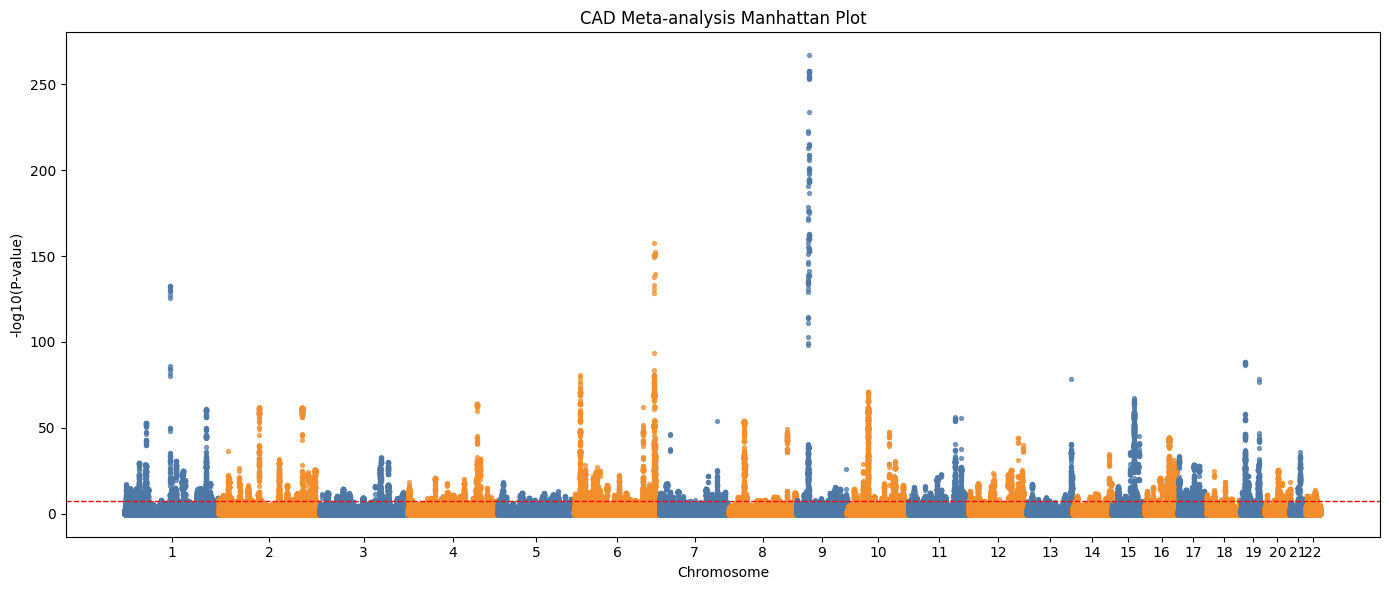

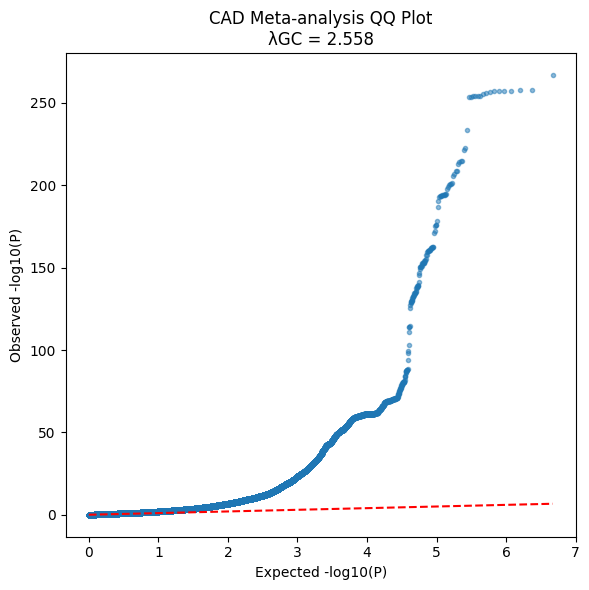

✅ QQ plot complete — Genomic inflation factor λGC = 2.558


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -----------------------------
# Load METAL meta-analysis file
# -----------------------------
meta_file = "meta_CAD_results1.tbl"
df = pd.read_csv(meta_file, sep="\t")

# Rename rsID column
df = df.rename(columns={"MarkerName": "SNP"})
df['P-value'] = pd.to_numeric(df['P-value'], errors='coerce')

# -----------------------------
# Load dbSNP rsID to CHR/POS map
# -----------------------------
rsmap = pd.read_csv("dbsnp_subset.txt", sep="\t", names=["CHR_raw", "POS", "REF", "ALT", "SNP"])

# Convert RefSeq ID to numeric chromosome
rsmap["CHR"] = rsmap["CHR_raw"].str.extract(r'NC_0+(\d+)\.')[0]
rsmap["CHR"] = rsmap["CHR"].replace({"23": "X", "24": "Y"})
rsmap = rsmap[["SNP", "CHR", "POS"]].drop_duplicates()

print(rsmap.head())

# Merge position info into meta results
df = df.merge(rsmap, on="SNP", how="inner")
df = df[df["CHR"].isin([str(i) for i in range(1, 23)])]  # autosomes only
df["CHR"] = df["CHR"].astype(int)
df["POS"] = df["POS"].astype(int)
df["-log10(P)"] = -np.log10(df["P-value"])

# Sort by chromosome and position
df = df.sort_values(["CHR", "POS"]).reset_index(drop=True)

# -----------------------------
# Manhattan Plot
# -----------------------------
def plot_manhattan(df, title="Manhattan Plot"):
    df["ind"] = range(len(df))
    df_grouped = df.groupby("CHR")

    fig, ax = plt.subplots(figsize=(14, 6))
    colors = ["#4e79a7", "#f28e2c"]
    x_labels = []
    x_labels_pos = []

    for i, (num, group) in enumerate(df_grouped):
        group.plot(kind='scatter', x='ind', y='-log10(P)', color=colors[i % 2], ax=ax, s=8, alpha=0.7)
        x_labels.append(num)
        x_labels_pos.append((group['ind'].iloc[-1] + group['ind'].iloc[0]) // 2)

    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel("Chromosome")
    ax.set_ylabel("-log10(P-value)")
    ax.set_title(title)
    ax.axhline(-np.log10(5e-8), color='red', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

# -----------------------------
# QQ Plot
# -----------------------------
from scipy.stats import chi2

def plot_qq(df, title="QQ Plot"):
    # Drop missing p-values
    pvals = df['P-value'].dropna()
    pvals = pvals[pvals > 0]  # avoid -log(0)

    # Compute observed chi2 stats
    chisq_obs = chi2.isf(pvals, df=1)  # inverse survival function = -log(1-p)

    # λGC = median observed / expected median under null
    lambda_gc = np.median(chisq_obs) / 0.4549364

    # QQ plot values
    expected = -np.log10(np.linspace(1 / len(pvals), 1, len(pvals)))
    observed = -np.log10(pvals.sort_values().values)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(expected, observed, '.', alpha=0.5)
    ax.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='--')
    ax.set_xlabel('Expected -log10(P)')
    ax.set_ylabel('Observed -log10(P)')
    ax.set_title(f"{title}\nλGC = {lambda_gc:.3f}")
    plt.tight_layout()
    plt.show()
    print(f"✅ QQ plot complete — Genomic inflation factor λGC = {lambda_gc:.3f}")

# -----------------------------
# Run Plots
# -----------------------------
plot_manhattan(df, title="CAD Meta-analysis Manhattan Plot")
plot_qq(df, title="CAD Meta-analysis QQ Plot")

In [76]:
# !zcat dbsnp_rsmap.tsv.gz | awk 'NR==FNR{keep[$1]; next} ($5 in keep)' rsids_sorted.txt - > dbsnp_subset.txt

In [79]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import uniform
# from scipy.stats import chi2
# %matplotlib inline

# # -------- Load METAL output --------
# file = "meta_CAD_results1.tbl"
# df = pd.read_csv(file, sep="\t")

# # -------- Parse CHR and POS from MarkerName --------
# df[['CHR', 'POS', 'REF', 'ALT']] = df['MarkerName'].str.split('_', expand=True)
# df = df[df['CHR'].isin([str(i) for i in range(1, 23)])]
# df['CHR'] = df['CHR'].astype(int)
# df['POS'] = df['POS'].astype(int)
# df['-log10(P)'] = -np.log10(df['P-value'])

# # Sort by chromosome and position
# df = df.sort_values(['CHR', 'POS'])

# # -------- Manhattan Plot --------
# def plot_manhattan(df, title="Manhattan Plot", genomewide_line=True):
#     df['ind'] = range(len(df))
#     df_grouped = df.groupby('CHR')

#     fig, ax = plt.subplots(figsize=(14, 6))
#     colors = ['#4e79a7', '#f28e2c']
#     x_labels = []
#     x_labels_pos = []

#     for i, (num, group) in enumerate(df_grouped):
#         group.plot(kind='scatter', x='ind', y='-log10(P)', color=colors[i % 2], ax=ax, s=8, alpha=0.7)
#         x_labels.append(num)
#         x_labels_pos.append((group['ind'].iloc[-1] + group['ind'].iloc[0]) // 2)

#     ax.set_xticks(x_labels_pos)
#     ax.set_xticklabels(x_labels)
#     ax.set_xlabel('Chromosome')
#     ax.set_ylabel('-log10(P-value)')
#     ax.set_title(title)
#     if genomewide_line:
#         ax.axhline(-np.log10(5e-8), color='red', linestyle='--', linewidth=1)
#     plt.tight_layout()
#     plt.show()
#     plt.close()
#     print("✅ Manhattan plot saved as manhattan_plot.png")

# # -------- QQ Plot --------
# def plot_qq(df, title="QQ Plot"):
#     observed_p = df['P-value'].dropna().sort_values()
#     expected = -np.log10(np.linspace(1/len(observed_p), 1, len(observed_p)))
#     observed = -np.log10(observed_p.values)

#     fig, ax = plt.subplots(figsize=(6, 6))
#     ax.plot(expected, observed, '.', alpha=0.5)
#     ax.plot([0, max(expected)], [0, max(expected)], color='red', linestyle='--')
#     ax.set_xlabel('Expected -log10(P)')
#     ax.set_ylabel('Observed -log10(P)')
#     ax.set_title(title)
#     plt.tight_layout()
#     plt.show()
#     plt.close()
#     print("✅ QQ plot saved as qq_plot.png")

# # -------- Run Plots --------
# plot_manhattan(df)
# plot_qq(df)

In [17]:
import pandas as pd

df = pd.read_csv("meta_CAD_results_2plus_studies.txt", sep="\t")
df_prs = df.rename(columns={"MarkerName": "SNP", "Allele1": "A1", "Allele2":"A2", "Effect": "BETA", "P-value":'P'})
df_prs = df_prs[["SNP", "A1", "A2", "BETA", "P"]]
df_prs['A1'] = df_prs['A1'].str.upper()
df_prs['A2'] = df_prs['A2'].str.upper()
df_prs.to_csv("PRS_INPUT_FILES/prs_input_2stduy_SNPs_EUR.txt", sep="\t", index=False)

In [ ]:
# GENO_PATH="/corral/utexas/UKB-Imaging-Genetics/UKB_GENOTYPE_QC_400k/merged_maf0.01_biallel_bbf_400k/merged_sub_chrom_maf0.01"
# PHENO_FILE="PRS_INPUT_FILES/subset_ids.txt"  # your file with FID IID CAD
# KEEP_FILE="PRS_INPUT_FILES/keep.txt"
# SUMSTATS="meta_output_for_prs.txt"  # your harmonized summary stats

In [ ]:
# !/work2/07880/devansh/lonestar/software/plink --bfile "$GENO_PATH" --keep "$KEEP_FILE" --make-bed --out PRS_INPUT_FILES/subset_data

In [ ]:
# import pandas as pd

# # Step 1: Load .bim file and build mapping
# bim = pd.read_csv("PRS_INPUT_FILES/subset_data.bim", sep="\t", header=None)
# bim.columns = ["CHR", "RSID", "CM", "BP", "A1", "A2"]

# # Construct position-based keys and flipped versions (to be safe)
# bim["key1"] = bim["CHR"].astype(str) + "_" + bim["BP"].astype(str) + "_" + bim["A1"] + "_" + bim["A2"]
# bim["key2"] = bim["CHR"].astype(str) + "_" + bim["BP"].astype(str) + "_" + bim["A2"] + "_" + bim["A1"]
# key_to_rsid = pd.Series(bim["RSID"].values, index=bim["key1"]).to_dict()
# key_to_rsid.update(pd.Series(bim["RSID"].values, index=bim["key2"]).to_dict())

# # Step 2: Load summary stats
# sumstats = pd.read_csv("meta_CAD_results2.tbl", sep="\t")

# # Step 3: Map MarkerName to RSID
# sumstats["RSID"] = sumstats["MarkerName"].str.upper().map(key_to_rsid)

# # Drop unmapped SNPs
# sumstats = sumstats.dropna(subset=["RSID"])

# # Step 4: Build PRS input file
# prs = sumstats[["RSID", "Allele1", "Allele2" "Effect", "P-value"]].copy()
# prs.columns = ["SNP", "A1", "A2","BETA", "P"]
# prs['A1'] = prs['A1'].str.upper()
# prs.to_csv("PRS_INPUT_FILES/prs_input_keyed.txt", sep="\t", index=False)

# print(f"✅ Created PRS_INPUT_FILES/prs_input_keyed.txt with {len(prs)} variants.")

**PRS CALCULATIONS**

In [83]:
!pwd

/scratch/07880/devansh/CAD/New_PRS


In [ ]:
# # --- Configuration ---
# GENO_PREFIX="PRS_INPUT_FILES/subset_data"
# SUMSTATS="PRS_INPUT_FILES/prs_input_keyed_pre_clump.txt"  # should contain SNP, P, BETA
# PHENO_COV="PRS_INPUT_FILES/subset_ids_plink.txt"       # FID IID CAD PC1 PC2
# OUTPUT_PREFIX="PRS_INPUT_FILES/prs_ct"

In [ ]:
!/work2/07880/devansh/lonestar/software/plink \
  --bfile PRS_INPUT_FILES/subset_data \
  --clump PRS_INPUT_FILES/prs_input_all_SNPs_EUR.txt \
  --clump-snp-field SNP \
  --clump-p1 1 \
  --clump-p2 1 \
  --clump-r2 0.1 \
  --clump-kb 250 \
  --clump-field P \
  --out PRS_INPUT_FILES/meta_clumped_all_SNPs_EUR

PLINK v1.90b7 64-bit (16 Jan 2023)             www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_INPUT_FILES/meta_clumped_all_SNPs_EUR.log.
Options in effect:
  --bfile PRS_INPUT_FILES/subset_data
  --clump PRS_INPUT_FILES/prs_input_all_SNPs_EUR.txt
  --clump-field P
  --clump-kb 250
  --clump-p1 1
  --clump-p2 1
  --clump-r2 0.1
  --clump-snp-field SNP
  --out PRS_INPUT_FILES/meta_clumped_all_SNPs_EUR

257135 MB RAM detected; reserving 128567 MB for main workspace.
8372812 variants loaded from .bim file.
57786 people (28055 males, 29731 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 57786 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718%

In [20]:
!awk 'NR > 1 {print $3}' PRS_INPUT_FILES/meta_clumped_all_SNPs_EUR.clumped > PRS_INPUT_FILES/clumped_snps_all_EUR.txt

In [21]:
!grep -Fwf PRS_INPUT_FILES/clumped_snps_all_EUR.txt PRS_INPUT_FILES/prs_input_all_SNPs_EUR.txt > PRS_INPUT_FILES/prs_clumped_all_EUR_sumstats.txt

In [22]:
# !awk '!seen[$1]++' PRS_INPUT_FILES/prs_clumped_3study_sumstats.txt > PRS_INPUT_FILES/prs_clumped_3study_sumstats_nodup.txt

In [4]:
# !/work2/07880/devansh/lonestar/software/plink2 \
#   --bfile PRS_INPUT_FILES/subset_data \
#   --score PRS_INPUT_FILES/prs_clumped_3study_sumstats.txt 1 2 4 \
#   --pheno PRS_INPUT_FILES/subset_ids_plink.txt \
#   --pheno-name CAD \
#   --out PRS_INPUT_FILES/PRS_clumped_results

PLINK v2.00a5LM AVX2 Intel (7 Jun 2023)        www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_INPUT_FILES/PRS_clumped_results.log.
Options in effect:
  --bfile PRS_INPUT_FILES/subset_data
  --out PRS_INPUT_FILES/PRS_clumped_results
  --pheno PRS_INPUT_FILES/subset_ids_plink.txt
  --pheno-name CAD
  --score PRS_INPUT_FILES/prs_clumped_sumstats.txt 1 2 4

Start time: Fri Aug  1 12:00:41 2025
257135 MiB RAM detected, ~247922 available; reserving 128567 MiB for main
workspace.
Using up to 128 threads (change this with --threads).
57786 samples (29731 females, 28055 males; 57786 founders) loaded from
PRS_INPUT_FILES/subset_data.fam.
8372812 variants loaded from PRS_INPUT_FILES/subset_data.bim.
1 binary phenotype loaded (3808 cases, 53978 controls).
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757

In [4]:
pvalue_thresholds = [5e-8, 1e-6, 1e-4, 1e-2, 0.05, 0.1, 0.5, 1.0]

In [2]:
import pandas as pd
import subprocess
import os

# Setup
sumstats_file = "PRS_INPUT_FILES/prs_clumped_all_EUR_sumstats.txt"
geno_prefix = "PRS_INPUT_FILES/subset_data"
pheno_file = "PRS_INPUT_FILES/subset_ids_plink.txt"
out_dir = "PRS_INPUT_FILES/PRS_THRESHOLDS"
os.makedirs(out_dir, exist_ok=True)

# Updated header order
sumstats = pd.read_csv(sumstats_file, sep="\t", header=None,
                       names=["SNP", "A1", "A2", "BETA", "P"])

sumstats['P'] = sumstats['P'].astype('float')
# Define p-value thresholds
thresholds = [ 0.5, 1.0] #5e-8, 1e-6, 1e-4, 1e-2, 0.05, 0.1,

# Run PRS at each threshold
for pval in thresholds:
    tag = str(pval).replace('.', 'p')
    filtered = sumstats[sumstats["P"] <= pval][["SNP", "A1", "BETA"]]
    score_file = f"{out_dir}/all_EUR_score_p{tag}.txt"
    out_prefix = f"{out_dir}/all_EUR_prs_p{tag}"

    # Save score file without header
    filtered.to_csv(score_file, sep="\t", index=False, header=False)

    cmd = [
        "/work2/07880/devansh/lonestar/software/plink2",
        "--bfile", geno_prefix,
        "--score", score_file, "1", "2", "3", "no-mean-imputation",
        "--pheno", pheno_file,
        "--pheno-name", "CAD",
        "--out", out_prefix
    ]

    print(f"Running PRS for P<={pval}, SNPs used: {filtered.shape[0]}")
    subprocess.run(cmd)

/tmp/ipykernel_2645187/3121561616.py:13: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sumstats = pd.read_csv(sumstats_file, sep="\t", header=None,


Running PRS for P<=0.5, SNPs used: 8462005
PLINK v2.00a5LM AVX2 Intel (7 Jun 2023)        www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p0p5.log.
Options in effect:
  --bfile PRS_INPUT_FILES/subset_data
  --out PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p0p5
  --pheno PRS_INPUT_FILES/subset_ids_plink.txt
  --pheno-name CAD
  --score PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_score_p0p5.txt 1 2 3 no-mean-imputation

Start time: Mon Aug 11 19:46:31 2025
257135 MiB RAM detected, ~243401 available; reserving 128567 MiB for main
workspace.
Using up to 128 threads (change this with --threads).
57786 samples (29731 females, 28055 males; 57786 founders) loaded from
PRS_INPUT_FILES/subset_data.fam.
8372812 variants loaded from PRS_INPUT_FILES/subset_data.bim.
1 binary phenotype loaded (3808 cases, 53978 controls).


and 5647 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 2943805 variants processed.
--score: Results written to
PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p0p5.sscore .
End time: Mon Aug 11 20:14:06 2025
Running PRS for P<=1.0, SNPs used: 14233202
PLINK v2.00a5LM AVX2 Intel (7 Jun 2023)        www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p1p0.log.
Options in effect:
  --bfile PRS_INPUT_FILES/subset_data
  --out PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p1p0
  --pheno PRS_INPUT_FILES/subset_ids_plink.txt
  --pheno-name CAD
  --score PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_score_p1p0.txt 1 2 3 no-mean-imputation

Start time: Mon Aug 11 20:14:25 2025
257135 MiB RAM detected, ~243221 available; reserving 128567 MiB for main
workspace.
Using up to 128 threads (change this with --threads).
57786 samples (29731 females, 28055 males; 57786 founders) loaded from
PRS_INPUT_FILES/subset_data.fam.
8372812 variants loaded from

and 9530 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 4336932 variants processed.
--score: Results written to
PRS_INPUT_FILES/PRS_THRESHOLDS/all_EUR_prs_p1p0.sscore .
End time: Mon Aug 11 20:47:05 2025


In [1]:
thresholds = [5e-8, 1e-6, 1e-4, 1e-2, 0.05, 0.1, 0.5, 1.0]
for pval in thresholds:
    print(str(pval).replace('.', 'p'))

5e-08
1e-06
0p0001
0p01
0p05
0p1
0p5
1p0


In [1]:
# from scipy.stats import norm
# import os
# import glob
# import re
# import numpy as np
# import pandas as pd
# from sklearn.metrics import roc_auc_score
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# %matplotlib inline


# # SETTINGS
# SCORE_COLUMN = "SCORE1_AVG"
# PHENOTYPE_COLUMN = "CAD"
# PREVALENCE = 0.118  # CAD population prevalence
# SCORE_FOLDER = "PRS_INPUT_FILES/PRS_THRESHOLDS"

# # LIABILITY R2 conversion
# def compute_liability_r2(obs_r2, K, P):
#     """Convert observed Nagelkerke R² to liability scale R²"""
#     z = norm.ppf(1 - K)
#     phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
#     c = K * (1 - K) / (phi**2)
#     return obs_r2 * c / (P * (1 - P))

# def nagelkerke_r2(y, X):
#     X = sm.add_constant(X)
#     model = sm.Logit(y, X).fit(disp=0)
#     llf = model.llf
#     llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
#     return 1 - (llf / llnull)

# def parse_threshold(filename):
#     base = os.path.basename(filename).replace("all_EUR_prs_p", "").replace(".sscore", "")
#     if base == "1p0":
#         return 1.0
#     if "e" in base.lower():
#         return float(base.replace("p", "e-"))
#     if base.startswith("0p"):
#         return float("0." + base.split("p")[-1])
#     raise ValueError(f"Could not parse threshold from {base}")

# results = []

# for file in sorted(glob.glob(f"{SCORE_FOLDER}/all_EUR_prs_*.sscore")):
#     try:
#         threshold = parse_threshold(file)

#         df = pd.read_csv(file, delim_whitespace=True, comment="#",
#                          names=["FID", "IID", "CAD", "ALLELE_CT", "NAMED_ALLELE_DOSAGE_SUM", "SCORE1_AVG"])
#         if df.empty or df[SCORE_COLUMN].isnull().all():
#             print(f"⚠️ Skipping {file}: empty or missing scores")
#             continue

#         y = df[PHENOTYPE_COLUMN].replace({1: 0, 2: 1})
#         X = df[SCORE_COLUMN]

#         if y.nunique() < 2:
#             print(f"⚠️ Skipping {file}: only one phenotype class")
#             continue

#         auc = roc_auc_score(y, X)
#         nk_r2 = nagelkerke_r2(y, X)
#         sample_K = y.mean()
#         liability_r2 = compute_liability_r2(nk_r2, PREVALENCE, sample_K)

#         results.append({
#             "Threshold": threshold,
#             "AUC": auc,
#             "Nagelkerke_R2": nk_r2,
#             "Liability_R2": liability_r2
#         })

#     except Exception as e:
#         print(f"❌ Failed on {file}: {e}")

# # Display
# if results:
#     results_df = pd.DataFrame(results)
#     results_df = results_df.sort_values(by="Threshold")

#     # Remove highly negative R2 for visualization
#     results_df_filtered = results_df[results_df["Nagelkerke_R2"] > -1]

#     print("\n🔍 PRS Performance Summary:")
#     print(results_df_filtered[["Threshold", "AUC", "Nagelkerke_R2", "Liability_R2"]])

#     # Plot
#     plt.figure(figsize=(12, 5))

#     plt.subplot(1, 2, 1)
#     plt.plot(results_df_filtered["Threshold"], results_df_filtered["AUC"], marker='o')
#     plt.xscale('log')
#     plt.xlabel("P-value Threshold")
#     plt.ylabel("AUC")
#     plt.title("AUC vs P-value Threshold")

#     plt.subplot(1, 2, 2)
#     plt.plot(results_df_filtered["Threshold"], results_df_filtered["Liability_R2"], marker='o', label="Liability R²")
#     plt.plot(results_df_filtered["Threshold"], results_df_filtered["Nagelkerke_R2"], marker='s', label="Nagelkerke R²")
#     plt.xscale('log')
#     plt.xlabel("P-value Threshold")
#     plt.ylabel("R²")
#     plt.title("R² vs P-value Threshold")
#     plt.legend()

#     plt.tight_layout()
#     plt.show()
# else:
#     print("❌ No valid PRS results were found.")

/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 


🔍 PRS Performance Summary:
      Threshold       AUC  Nagelkerke_R2  Liability_R2
7  5.000000e-08  0.572983       0.008789      0.380251
5  1.000000e-06  0.579676       0.010536      0.455877
0  1.000000e-04  0.588160       0.012616      0.545832
1  1.000000e-02  0.605641       0.017971      0.777530
2  5.000000e-02  0.609841       0.005237      0.226597


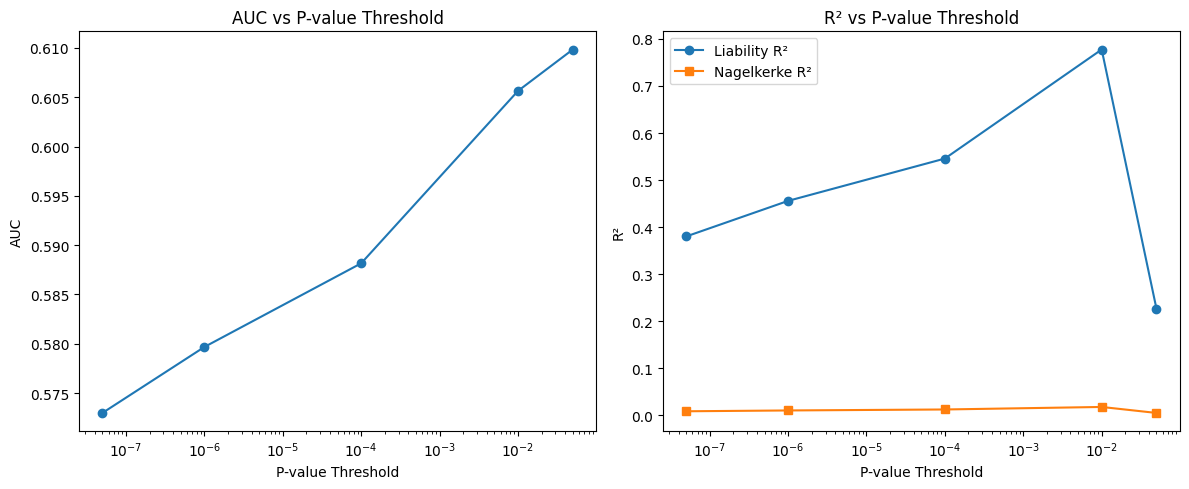

In [4]:
from scipy.stats import norm
import os
import glob
import re
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


# SETTINGS
SCORE_COLUMN = "SCORE1_AVG"
PHENOTYPE_COLUMN = "CAD"
PREVALENCE = 0.118  # CAD population prevalence
SCORE_FOLDER = "PRS_INPUT_FILES/PRS_THRESHOLDS"

# LIABILITY R2 conversion
def compute_liability_r2(obs_r2, K, P):
    """Convert observed Nagelkerke R² to liability scale R²"""
    z = norm.ppf(1 - K)
    phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    c = K * (1 - K) / (phi**2)
    return obs_r2 * c / (P * (1 - P))

def nagelkerke_r2(y, X):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    llf = model.llf
    llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
    return 1 - (llf / llnull)

def parse_threshold(filename):
    base = os.path.basename(filename).replace("EUR_2study_prs_p", "").replace(".sscore", "")
    if base == "1p0":
        return 1.0
    if "e" in base.lower():
        return float(base.replace("p", "e-"))
    if base.startswith("0p"):
        return float("0." + base.split("p")[-1])
    raise ValueError(f"Could not parse threshold from {base}")

results = []

for file in sorted(glob.glob(f"{SCORE_FOLDER}/EUR_2study_prs_*.sscore")):
    try:
        threshold = parse_threshold(file)

        df = pd.read_csv(file, delim_whitespace=True, comment="#",
                         names=["FID", "IID", "CAD", "ALLELE_CT", "NAMED_ALLELE_DOSAGE_SUM", "SCORE1_AVG"])
        if df.empty or df[SCORE_COLUMN].isnull().all():
            print(f"⚠️ Skipping {file}: empty or missing scores")
            continue

        y = df[PHENOTYPE_COLUMN].replace({1: 0, 2: 1})
        X = df[SCORE_COLUMN]

        if y.nunique() < 2:
            print(f"⚠️ Skipping {file}: only one phenotype class")
            continue

        auc = roc_auc_score(y, X)
        nk_r2 = nagelkerke_r2(y, X)
        sample_K = y.mean()
        liability_r2 = compute_liability_r2(nk_r2, PREVALENCE, sample_K)

        results.append({
            "Threshold": threshold,
            "AUC": auc,
            "Nagelkerke_R2": nk_r2,
            "Liability_R2": liability_r2
        })

    except Exception as e:
        print(f"❌ Failed on {file}: {e}")

# Display
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Threshold")

    # Remove highly negative R2 for visualization
    results_df_filtered = results_df[results_df["Nagelkerke_R2"] > -1]

    print("\n🔍 PRS Performance Summary:")
    print(results_df_filtered[["Threshold", "AUC", "Nagelkerke_R2", "Liability_R2"]])

    # Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["AUC"], marker='o')
    plt.xscale('log')
    plt.xlabel("P-value Threshold")
    plt.ylabel("AUC")
    plt.title("AUC vs P-value Threshold")

    plt.subplot(1, 2, 2)
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["Liability_R2"], marker='o', label="Liability R²")
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["Nagelkerke_R2"], marker='s', label="Nagelkerke R²")
    plt.xscale('log')
    plt.xlabel("P-value Threshold")
    plt.ylabel("R²")
    plt.title("R² vs P-value Threshold")
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid PRS results were found.")


/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 


🔍 PRS Performance Summary:
      Threshold       AUC  Nagelkerke_R2  Liability_R2
7  5.000000e-08  0.582281       0.087286      3.781230
5  1.000000e-06  0.586516       0.088614      3.838747
0  1.000000e-04  0.590980       0.089855      3.892478
1  1.000000e-02  0.602004       0.093905      4.067939
2  5.000000e-02  0.607107       0.095944      4.156269


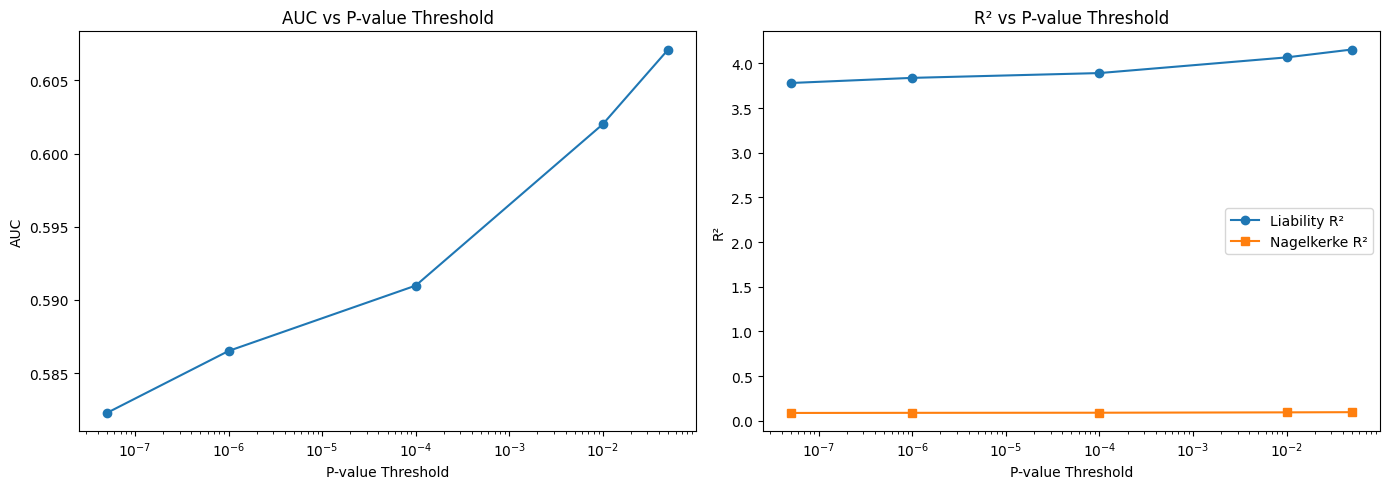

In [3]:
from scipy.stats import norm
import os
import glob
import re
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# SETTINGS
SCORE_COLUMN = "SCORE1_AVG"
PHENOTYPE_COLUMN = "CAD"
AGE_SEX_PATHS = {
    "age": "/scratch/07880/devansh/CAD/fid21003.csv",
    "sex": "/scratch/07880/devansh/CAD/fid31.csv"
}
SCORE_FOLDER = "PRS_INPUT_FILES/PRS_THRESHOLDS"

# Read age and sex files
age_df = pd.read_csv(AGE_SEX_PATHS["age"]).rename(columns={'eid': 'IID', '21003-2.0': 'age'})[['IID', 'age']]
sex_df = pd.read_csv(AGE_SEX_PATHS["sex"]).rename(columns={'eid': 'IID', '31-0.0': 'sex'})[['IID', 'sex']]

# LIABILITY R2 conversion

def compute_liability_r2(obs_r2, K, P):
    """Convert observed Nagelkerke R² to liability scale R²"""
    z = norm.ppf(1 - K)
    phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    c = K * (1 - K) / (phi**2)
    return obs_r2 * c / (P * (1 - P))

def nagelkerke_r2(y, X):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    llf = model.llf
    llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
    return 1 - (llf / llnull)

def parse_threshold(filename):
    base = os.path.basename(filename).replace("prs_p", "").replace(".sscore", "")
    if base == "1p0":
        return 1.0
    if "e" in base.lower():
        return float(base.replace("p", "e-"))
    if base.startswith("0p"):
        return float("0." + base.split("p")[-1])
    raise ValueError(f"Could not parse threshold from {base}")

results = []

for file in sorted(glob.glob(f"{SCORE_FOLDER}/prs_*.sscore")):
    try:
        threshold = parse_threshold(file)

        df = pd.read_csv(file, delim_whitespace=True, comment="#",
                         names=["FID", "IID", "CAD", "ALLELE_CT", "NAMED_ALLELE_DOSAGE_SUM", "SCORE1_AVG"])
        if df.empty or df[SCORE_COLUMN].isnull().all():
            print(f"⚠️ Skipping {file}: empty or missing scores")
            continue

        # Merge age and sex
        df = df.merge(age_df, on="IID", how="inner").merge(sex_df, on="IID", how="inner")
        df = df.dropna(subset=["age", "sex", "SCORE1_AVG", "CAD"])

        # Encode phenotype
        y = df[PHENOTYPE_COLUMN].replace({1: 0, 2: 1})  # 1=control, 2=case
        if y.nunique() < 2:
            print(f"⚠️ Skipping {file}: only one phenotype class")
            continue

        # Covariates: age, sex, PRS
        X = df[[SCORE_COLUMN, "age", "sex"]]
        auc = roc_auc_score(y, df[SCORE_COLUMN])

        nk_r2 = nagelkerke_r2(y, X)
        sample_K = y.mean()  # Sample prevalence
        liability_r2 = compute_liability_r2(nk_r2, 0.118, sample_K)

        results.append({
            "Threshold": threshold,
            "Sample_Prevalence": sample_K,
            "AUC": auc,
            "Nagelkerke_R2": nk_r2,
            "Liability_R2": liability_r2
        })

    except Exception as e:
        print(f"❌ Failed on {file}: {e}")

# Display
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Threshold")

    # Remove highly negative R2 for visualization
    results_df_filtered = results_df[results_df["Nagelkerke_R2"] > -1]

    print("\n🔍 PRS Performance Summary:")
    print(results_df_filtered[["Threshold", "AUC", "Nagelkerke_R2", "Liability_R2" ]])

    # Plot
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["AUC"], marker='o')
    plt.xscale('log')
    plt.xlabel("P-value Threshold")
    plt.ylabel("AUC")
    plt.title("AUC vs P-value Threshold")

    plt.subplot(1, 2, 2)
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["Liability_R2"], marker='o', label="Liability R²")
    plt.plot(results_df_filtered["Threshold"], results_df_filtered["Nagelkerke_R2"], marker='s', label="Nagelkerke R²")
    plt.xscale('log')
    plt.xlabel("P-value Threshold")
    plt.ylabel("R²")
    plt.title("R² vs P-value Threshold")
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid PRS results were found.")

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from scipy.stats import norm

# -------------------------------
# 🔧 Paths and Settings
# -------------------------------
PRS_FILE = "/scratch/07880/devansh/CAD/New_PRS/PRS_INPUT_FILES/PRS_THRESHOLDS/prs_p1p0.sscore"
PHENO_FILE = "/scratch/07880/devansh/CAD/New_PRS/PRS_INPUT_FILES/subset_ids_plink.txt"
AGE_FILE = "/scratch/07880/devansh/CAD/fid21003.csv"
SEX_FILE = "/scratch/07880/devansh/CAD/fid31.csv"
PREVALENCE = 0.0773

# -------------------------------
# 📥 Load Data
# -------------------------------
# PRS
prs = pd.read_csv(PRS_FILE, delim_whitespace=True)
prs = prs.drop(['CAD'], axis = 1)


# Phenotype: 1 = control, 2 = case → convert to binary: 0 = control, 1 = case
pheno = pd.read_csv(PHENO_FILE, delim_whitespace=True)
pheno["CAD"] = pheno["CAD"].replace({1: 0, 2: 1})


# Age
age = pd.read_csv(AGE_FILE).rename(columns={"eid": "IID", "21003-2.0": "age"})[["IID", "age"]]

# Sex
sex = pd.read_csv(SEX_FILE).rename(columns={"eid": "IID", "31-0.0": "sex"})[["IID", "sex"]]

# -------------------------------
# 🧬 Merge all data
# -------------------------------
df = prs.merge(pheno, on="IID")
df = df.merge(age, on="IID")
df = df.merge(sex, on="IID")

df = df.dropna()

print(df.head())
# -------------------------------
# 📈 Metrics
# -------------------------------
def compute_liability_r2(obs_r2, K, P):
    """Convert observed Nagelkerke R² to liability scale R²"""
    z = norm.ppf(1 - K)
    phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    c = K * (1 - K) / (phi**2)
    return obs_r2 * c / (P * (1 - P))

def nagelkerke_r2(y, X):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    llf = model.llf
    llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
    return 1 - (llf / llnull)


# -------------------------------
# 🧮 Compute
# -------------------------------
y = df["CAD"]
X_full = df[["SCORE1_AVG", "age", "sex"]]

# AUC
auc = roc_auc_score(y, df["SCORE1_AVG"])

# Nagelkerke R²
nk_r2 = nagelkerke_r2(y, X_full)

# Liability R²
sample_prev = y.mean()
liab_r2 = compute_liability_r2(nk_r2, PREVALENCE, sample_prev)

# -------------------------------
# 📊 Display
# -------------------------------
print("\n📍 PRS based on MetaGWAS on PRSsc with Age and Sex as Covariates")
print(f"Sample prevalence: {sample_prev:.3f}")
print(f"AUC:               {auc:.4f}")
print(f"Nagelkerke R²:     {nk_r2:.4f}")

      #FID      IID  ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM  SCORE1_AVG      FID  \
0  1000026  1000026    4785388                  2292015   -0.002653  1000026   
1  1000245  1000245    4787926                  2290291   -0.002650  1000245   
2  1000276  1000276    4790112                  2301386   -0.002658  1000276   
3  1000431  1000431    4783684                  2284474   -0.002641  1000431   
4  1000514  1000514    4782738                  2301918   -0.002663  1000514   

   CAD   age  sex  
0    0  73.0    1  
1    0  78.0    1  
2    0  67.0    0  
3    0  70.0    0  
4    0  78.0    0  

📍 PRS based on MetaGWAS on PRSsc with Age and Sex as Covariates
Sample prevalence: 0.066
AUC:               0.6105
Nagelkerke R²:     -1.9661


/work/07880/devansh/anaconda3/envs/pyt_env/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

# -------------------------------
# 🔧 Paths and Settings
# -------------------------------
PRS_FILE = "/scratch/07880/devansh/CAD/Code_Analysis/prs_output_CAD_PRS_new.txt"
PHENO_FILE = "/scratch/07880/devansh/CAD/New_PRS/PRS_INPUT_FILES/subset_ids_plink.txt"
AGE_FILE = "/scratch/07880/devansh/CAD/fid21003.csv"
SEX_FILE = "/scratch/07880/devansh/CAD/fid31.csv"
PREVALENCE = 0.0773

# -------------------------------
# 📥 Load Data
# -------------------------------
# PRS
prs = pd.read_csv(PRS_FILE, delim_whitespace=True)

# Phenotype: 1 = control, 2 = case → convert to 0/1
pheno = pd.read_csv(PHENO_FILE, delim_whitespace=True)
pheno["CAD"] = pheno["CAD"].replace({1: 0, 2: 1})

# Age
age = pd.read_csv(AGE_FILE).rename(columns={"eid": "IID", "21003-2.0": "age"})[["IID", "age"]]

# Sex
sex = pd.read_csv(SEX_FILE).rename(columns={"eid": "IID", "31-0.0": "sex"})[["IID", "sex"]]

# -------------------------------
# 🧬 Merge all data
# -------------------------------
df = prs.merge(pheno, on="IID")
df = df.merge(age, on="IID")
df = df.merge(sex, on="IID")
df = df.dropna()

# -------------------------------
# 📈 Metric Functions
# -------------------------------
def compute_liability_r2(obs_r2, K, P):
    """Convert observed Nagelkerke R² to liability scale R²"""
    z = norm.ppf(1 - K)
    phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    c = K * (1 - K) / (phi**2)
    return obs_r2 * c / (P * (1 - P))

def nagelkerke_r2(y, X):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    llf = model.llf
    llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
    return 1 - (llf / llnull)

# -------------------------------
# 🧮 Compute Scores
# -------------------------------
y = df["CAD"]
X_cov = df[["SCORE1_SUM", "age", "sex"]]

# AUC
auc = roc_auc_score(y, df["SCORE1_SUM"])

# R²
nk_r2 = nagelkerke_r2(y, X_cov)
sample_prev = y.mean()
liab_r2 = compute_liability_r2(nk_r2, PREVALENCE, sample_prev)

# -------------------------------
# 📊 Output
# -------------------------------
print("\n📍 GPSmult (with age + sex as covariates)")
print(f"Sample prevalence: {sample_prev:.3f}")
print(f"AUC:               {auc:.4f}")
print(f"Nagelkerke R²:     {nk_r2:.4f}")


📍 GPSmult (with age + sex as covariates)
Sample prevalence: 0.066
AUC:               0.6468
Nagelkerke R²:     0.1159


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

# -------------------------------
# 🔧 Paths and Settings
# -------------------------------
PRS_FILE = "/scratch/07880/devansh/CAD/New_PRS/PRS_INPUT_FILES/PRS_THRESHOLDS/prs_output_CAD_old_regenie.txt"
PHENO_FILE = "/scratch/07880/devansh/CAD/New_PRS/PRS_INPUT_FILES/subset_ids_plink.txt"
AGE_FILE = "/scratch/07880/devansh/CAD/fid21003.csv"
SEX_FILE = "/scratch/07880/devansh/CAD/fid31.csv"
PREVALENCE = 0.0773

# -------------------------------
# 📥 Load Data
# -------------------------------
# PRS
prs = pd.read_csv(PRS_FILE, delim_whitespace=True)

# Phenotype: 1 = control, 2 = case → convert to 0/1
pheno = pd.read_csv(PHENO_FILE, delim_whitespace=True)
pheno["CAD"] = pheno["CAD"].replace({1: 0, 2: 1})

# Age
age = pd.read_csv(AGE_FILE).rename(columns={"eid": "IID", "21003-2.0": "age"})[["IID", "age"]]

# Sex
sex = pd.read_csv(SEX_FILE).rename(columns={"eid": "IID", "31-0.0": "sex"})[["IID", "sex"]]

# -------------------------------
# 🧬 Merge all data
# -------------------------------
df = prs.merge(pheno, on="IID")
df = df.merge(age, on="IID")
df = df.merge(sex, on="IID")
df = df.dropna()

# -------------------------------
# 📈 Metric Functions
# -------------------------------
def compute_liability_r2(obs_r2, K, P):
    """Convert observed Nagelkerke R² to liability scale R²"""
    z = norm.ppf(1 - K)
    phi = np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    c = K * (1 - K) / (phi**2)
    return obs_r2 * c / (P * (1 - P))

def nagelkerke_r2(y, X):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    llf = model.llf
    llnull = sm.Logit(y, sm.add_constant(np.ones(len(y)))).fit(disp=0).llf
    return 1 - (llf / llnull)

# -------------------------------
# 🧮 Compute Scores
# -------------------------------
y = df["CAD"]
X_cov = df[["SCORE1_SUM", "age", "sex"]]

# AUC
auc = roc_auc_score(y, df["SCORE1_SUM"])

# R²
nk_r2 = nagelkerke_r2(y, X_cov)
sample_prev = y.mean()
liab_r2 = compute_liability_r2(nk_r2, PREVALENCE, sample_prev)

# -------------------------------
# 📊 Output
# -------------------------------
print("\n📍 UKB Case Control PRS (with age + sex as covariates)")
print(f"Sample prevalence: {sample_prev:.3f}")
print(f"AUC:               {auc:.4f}")
print(f"Nagelkerke R²:     {nk_r2:.4f}")


📍 UKB Case Control PRS (with age + sex as covariates)
Sample prevalence: 0.066
AUC:               0.6132
Nagelkerke R²:     0.0981


In [3]:
results_df_filtered[["Threshold", "AUC", "Nagelkerke_R2"]]

,Threshold,AUC,Nagelkerke_R2
7,5.000000e-08,0.551849,0.080116
5,1.000000e-06,0.553788,0.080490
0,1.000000e-04,0.565071,0.083023
1,1.000000e-02,0.575569,0.085770
2,5.000000e-02,0.575746,0.086317
3,1.000000e-01,0.576787,0.086577


In [5]:
df['label'].value_counts()

label
0    53978
1     3808
Name: count, dtype: int64

In [6]:
df["PRS_scaled"] = (df["SCORE1_AVG"] - df["SCORE1_AVG"].mean()) / df["SCORE1_AVG"].std()

In [7]:
import statsmodels.api as sm

X = df[["PRS_scaled"]]  # add covariates like 'age', 'sex', 'PC1' etc. if available
X = sm.add_constant(X)
y = df["label"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.240585
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                57786
Model:                          Logit   Df Residuals:                    57784
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                0.009522
Time:                        11:09:53   Log-Likelihood:                -13902.
converged:                       True   LL-Null:                       -14036.
Covariance Type:            nonrobust   LLR p-value:                 4.389e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6842      0.017   -155.372      0.000      -2.718      -2.650
PRS_scaled     0.2752      0.

In [8]:
import numpy as np
odds_ratio = np.exp(model.params["PRS_scaled"])
ci = np.exp(model.conf_int().loc["PRS_scaled"])
print(f"Odds Ratio: {odds_ratio:.2f} (95% CI: {ci[0]:.2f} – {ci[1]:.2f})")

Odds Ratio: 1.32 (95% CI: 1.27 – 1.36)


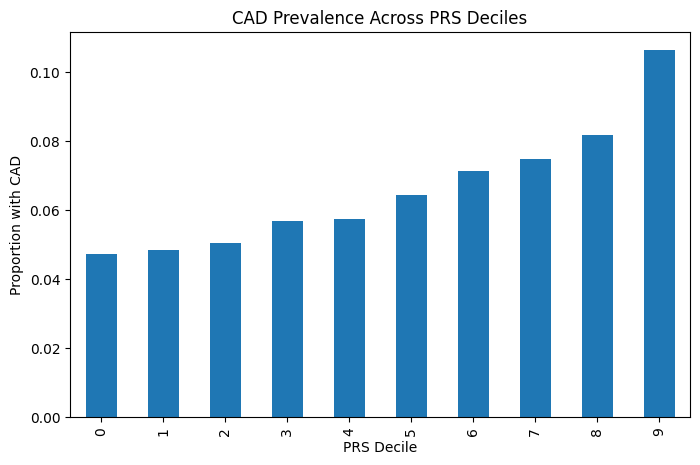

In [9]:
df["decile"] = pd.qcut(df["PRS_scaled"], 10, labels=False)
summary = df.groupby("decile")["label"].mean()

summary.plot(kind="bar", figsize=(8,5))
plt.ylabel("Proportion with CAD")
plt.xlabel("PRS Decile")
plt.title("CAD Prevalence Across PRS Deciles")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# === Step 1: Load PRS results file ===
# Replace with your actual path
prs_path = "PRS_INPUT_FILES/PRS_results.sscore"

df = pd.read_csv(prs_path, delim_whitespace=True)

# Make sure columns are correctly labeled
assert {'CAD', 'SCORE1_AVG'}.issubset(df.columns), "Required columns missing."

# === Step 2: Standardize PRS ===
scaler = StandardScaler()
df["PRS_scaled"] = scaler.fit_transform(df[["SCORE1_AVG"]])

# === Step 3: Prepare variables for logistic regression ===
X = sm.add_constant(df["PRS_scaled"])
y = df["CAD"].replace({1: 0, 2: 1})  # PLINK uses 1=control, 2=case

# === Step 4: Fit logistic regression model ===
model = sm.Logit(y, X).fit(disp=False)

# === Step 5: Compute Nagelkerke R² ===
llf_full = model.llf
llf_null = model.llnull
n = model.nobs

R2_cs = 1 - np.exp((llf_null - llf_full) * 2 / n)
R2_nagelkerke = R2_cs / (1 - np.exp(llf_null * 2 / n))

print(f"\n📊 Nagelkerke R² = {R2_nagelkerke:.4f}")


📊 Nagelkerke R² = 0.0119
